# Preprocessing Notebook

In [1]:
import pandas as pd
import geopandas as gpd
from ydata_profiling import ProfileReport
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.0 First, air stations pre-processing

In [2]:
air_stations = pd.read_csv('data/air_quality_stations.csv')

In [3]:
air_stations.sort_values(by="id").head(23)

id state  latitude  longitude
18   1   ACT  5.129059 -73.895885
17   2   ACT  4.733274 -74.266156
10   3   ACT  4.584585 -74.219878
3    4   ACT  4.596229 -74.194715
22   5   ACT  4.525167 -74.243535
4    6   ACT  4.695702 -74.215583
12   7   ACT  4.719539 -73.968738
0    8   ACT  4.530214 -74.142217
15   9   ACT  5.066150 -73.878100
11  10   ACT  5.010013 -74.002743
21  11   ACT  5.540477 -73.632574
14  12   ACT  5.054945 -73.976986
16  13   ACT  4.939167 -74.010833
8   14   ACT  4.716525 -74.211712
19  15   ACT  4.976390 -73.970698
6   16   ACT  4.298055 -74.819167
5   17   ACT  4.862871 -74.056341
1   18   ACT  4.940316 -73.970698
13  19   ACT  4.721387 -74.236610
2   20   ACT  5.200000 -73.883000
20  21   ACT  5.537028 -73.635303
9   22   ACT  4.809444 -74.102500
7   23   ACT  4.594991 -74.204826

In [4]:
# Crear el mapa interactivo con las estaciones
fig = px.scatter_map(
    air_stations,
    lat='latitude',
    lon='longitude',
    hover_name='id',  # Muestra el id al pasar el mouse
    hover_data={
        'latitude': ':.4f',  # Formato con 4 decimales
        'longitude': ':.4f',
        'state': True
    },
    zoom=8,  # Nivel de zoom inicial
    height=600,
    title='Estaciones de Medición de Calidad del Aire - Cundinamarca/Boyacá'
)

# Personalizar el diseño
fig.update_traces(marker=dict(size=12, color='red'))
fig.update_layout(
    map_style="open-street-map",  # Estilo de mapa OpenStreetMap
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

## 2.0 Emission permits

In [5]:
emission_permits = gpd.read_file('data/emission_permits_anom_2.json')
# Convertir GeoDataFrame a DataFrame normal
emission_permits['latitude'] = emission_permits.geometry.y
emission_permits['longitude'] = emission_permits.geometry.x
emission_permits = pd.DataFrame(emission_permits.drop(columns=['geometry']))

In [6]:
emission_permits.head()

IDExpediente                 Estado          Regional  Departamento  \
0       73640.0  Seguimiento y Control  Sabana Occidente  Cundinamarca   
1       73788.0  Seguimiento y Control             Ubate  Cundinamarca   
2       74314.0  Seguimiento y Control  Sabana Occidente  Cundinamarca   
3       75972.0  Seguimiento y Control  Sabana Occidente  Cundinamarca   
4       78824.0  Seguimiento y Control  Sabana Occidente  Cundinamarca   

     Municipio     Vereda Class TipoCombustible  TipoFuenteEmision  \
0     MOSQUERA     CENTRO  None           Otros              Horno   
1  LENGUAZAQUE  Resguardo  None          Carbón      Caldera Horno   
2       MADRID   LA PUNTA  None            ACPM      Caldera Horno   
3     MOSQUERA  Balsillas  None   Fuel Oil No.8  Planta de Asfalto   
4        FUNZA    El Hato  None          Carbón      Caldera Horno   

       Cuenca  latitude  longitude  
0  Río Bogotá  4.703418 -74.226561  
1  Río Suárez  5.318407 -73.704281  
2  Río Bogotá  4.800462 -74.210355  
3  Río Bogotá  4.678797 -74.284112  
4  Río Bogotá  4.699590 -74.193752

In [9]:
report = ProfileReport(emission_permits, title="Emission Permits Data Profile", explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Perfilamiento:
- **IDExpediente**: Identificador único, aunque solo 92.3% de los IDs son diferentes, probablemente algunas compañías tienen múltiples ubicaciones
- **Estado**: La mayoría de las estaciones están en estado Sancionatorio (321). Hay 7 "En Trámite" y 216 en "Seguimiento y control".
- **Regional**: De la región donde se ubica el lugar. Puede ser útil para filtros regionales. 14 Distintos.
- **Departamento**: Puede ser útil para filtros departamentales. 3 Distintos
- **Municipio**: Puede ser útil para filtros municipales. 65 Distintos.
- **Vereda**: Muchos valores distintos (148) Omitiría este filtro
- **Class**: 41% de los campos son null. Solo no es null para los permisos de emisión en estado "Sancionatorio".
- **TipoCombustible**: Toma valor "(sin definir)" para permisos en estado "Sancionatorio" y "En Trámite"
- **TipoFuenteEmision**: Igual que el campo anterior
- **Cuenca**: Solo 77 datos no tienen una cuenca asociada
- **latitude** y **longitude**: Hay unos cuantos datos corridos en el mapa. Deben ser arreglados.

In [7]:
emission_permits.drop_duplicates(inplace=True)

### Cuencas, tipos de combustible y de emisión

Los tipos de fuente de emisión muestran valores raros. Debemos ver cómo unificarlos, o dejar ir esta columna.

In [8]:
print("Las cuencas son: ", emission_permits['Cuenca'].unique())
print("================================")
print("Los tipos de combustible son: ", emission_permits['TipoCombustible'].unique())
print("================================")
print("Los tipos de emisión son: ", emission_permits['TipoFuenteEmision'].unique())

Las cuencas son:  ['Río Bogotá' 'Río Suárez' '(sin definir)' 'Río Sumapaz' 'Río Machetá'
 'Río Seco - Río Magdalena' 'Río Negro']
Los tipos de combustible son:  ['Otros' 'Carbón' 'ACPM' 'Fuel Oil No.8' 'Coque' 'NoAplica' 'Madera' 'Gas'
 '(sin definir)' 'Leña' 'Mezcla' 'Hulla']
Los tipos de emisión son:  ['Horno' 'Caldera Horno' 'Planta de Asfalto' 'Caldera' 'Secadores'
 'NoAplica (área de operación)' 'PLANTA DE ASFALTO ADM' 'REACTOR'
 'FILTRO MOLINO PENDULAR' 'Molino' 'Barrilado de grafito ' '(sin definir)'
 'Aspiración molino Danioni I' 'TRITURADOR DE ESCOMBROS' 'HORNO DE SECADO'
 'CAMPANA DE EXTRACCIÓN  PLOMO 1' 'TRITURADORA' 'Chimenea 1'
 'Horno arcillas de Soacha tipo túnel' 'TRITURADOR DE MATERIAL'
 'HORNO TÚNEL 1 SOACHA 2' 'Trituradora' 'Chimenea Triunfo central'
 '700 BHP VR2' 'molino' 'PLANTA DE MEZCLA ASFÁLTICA'
 'Batería de coquización A' 'molino buhler' 'PLANTA TRITURADORA '
 'Batería de producción de coque']


### Reparar la ubicación de algunas de las estaciones

In [9]:
print("Estadísticas de coordenadas:")
print(f"Latitude - Min: {emission_permits['latitude'].min():.2f}, Max: {emission_permits['latitude'].max():.2f}")
print(f"Longitude - Min: {emission_permits['longitude'].min():.2f}, Max: {emission_permits['longitude'].max():.2f}")

coords_correctas = emission_permits[(emission_permits['longitude'] < -70) & (emission_permits['longitude'] > -75) & 
                                     (emission_permits['latitude'] > 4) & (emission_permits['latitude'] < 7)]
coords_incorrectas = emission_permits[(emission_permits['longitude'] > -70) | (emission_permits['longitude'] < -75) | 
                                       (emission_permits['latitude'] < 4) | (emission_permits['latitude'] > 7)]

print(f"\nPuntos correctos: {len(coords_correctas)}")
print(f"Puntos incorrectos: {len(coords_incorrectas)}")

print("\nMuestra de coordenadas incorrectas:")
print(coords_incorrectas[['IDExpediente', 'Municipio', 'longitude', 'latitude']].head(10))

Estadísticas de coordenadas:
Latitude - Min: 3.89, Max: 86.09
Longitude - Min: -74.82, Max: -39.89

Puntos correctos: 459
Puntos incorrectos: 77

Muestra de coordenadas incorrectas:
    IDExpediente Municipio  longitude   latitude
19      124002.0    SIBATE -40.543104  11.876446
21      127196.0      NILO -74.457576   3.978951
35      136448.0    SOACHA -40.527335  11.886869
36      136490.0  RICAURTE -74.371055   3.887967
38      136886.0    SIBATE -40.541236  11.873642
40      137218.0    SIBATE -40.543524  11.879025
44      139882.0    SOACHA -40.501231  11.869339
60      148522.0    SIBATE -40.541205  11.876106
71      154642.0    SOACHA -40.506221  11.892809
83      166542.0    SIBATE -40.553758  11.868159


In [10]:
puntos_soacha_correctos = coords_correctas[coords_correctas['Municipio'] == 'SOACHA']
puntos_soacha_incorrectos = coords_incorrectas[coords_incorrectas['Municipio'] == 'SOACHA']

print("Puntos SOACHA correctos (muestra):")
print(puntos_soacha_correctos[['IDExpediente', 'longitude', 'latitude']].head(3))
print("\nPuntos SOACHA incorrectos (muestra):")
print(puntos_soacha_incorrectos[['IDExpediente', 'longitude', 'latitude']].head(3))

if len(puntos_soacha_correctos) > 0 and len(puntos_soacha_incorrectos) > 0:
    lon_correcto_promedio = puntos_soacha_correctos['longitude'].mean()
    lat_correcto_promedio = puntos_soacha_correctos['latitude'].mean()
    lon_incorrecto_promedio = puntos_soacha_incorrectos['longitude'].mean()
    lat_incorrecto_promedio = puntos_soacha_incorrectos['latitude'].mean()
    
    delta_lon = lon_correcto_promedio - lon_incorrecto_promedio
    delta_lat = lat_correcto_promedio - lat_incorrecto_promedio
    
    print(f"\nTraslación calculada:")
    print(f"Delta Longitude: {delta_lon:.6f}")
    print(f"Delta Latitude: {delta_lat:.6f}")

Puntos SOACHA correctos (muestra):
    IDExpediente  longitude  latitude
41      137254.0 -74.242432  4.582978
51      142884.0 -74.196453  4.520138
56      145760.0 -74.210626  4.562457

Puntos SOACHA incorrectos (muestra):
    IDExpediente  longitude   latitude
35      136448.0 -40.527335  11.886869
44      139882.0 -40.501231  11.869339
71      154642.0 -40.506221  11.892809

Traslación calculada:
Delta Longitude: -33.703404
Delta Latitude: -7.329896


In [11]:
mask_incorrectos = (emission_permits['longitude'] > -70) | (emission_permits['longitude'] < -75) | \
                   (emission_permits['latitude'] < 4) | (emission_permits['latitude'] > 7)

emission_permits.loc[mask_incorrectos, 'longitude'] = emission_permits.loc[mask_incorrectos, 'longitude'] + delta_lon
emission_permits.loc[mask_incorrectos, 'latitude'] = emission_permits.loc[mask_incorrectos, 'latitude'] + delta_lat

print("Corrección aplicada!")
print(f"\nNuevas estadísticas de coordenadas:")
print(f"Latitude - Min: {emission_permits['latitude'].min():.2f}, Max: {emission_permits['latitude'].max():.2f}")
print(f"Longitude - Min: {emission_permits['longitude'].min():.2f}, Max: {emission_permits['longitude'].max():.2f}")

coords_correctas_final = emission_permits[(emission_permits['longitude'] < -70) & (emission_permits['longitude'] > -75) & 
                                           (emission_permits['latitude'] > 4) & (emission_permits['latitude'] < 7)]
coords_incorrectas_final = emission_permits[(emission_permits['longitude'] > -70) | (emission_permits['longitude'] < -75) | 
                                             (emission_permits['latitude'] < 4) | (emission_permits['latitude'] > 7)]

print(f"\nPuntos correctos después de corrección: {len(coords_correctas_final)}")
print(f"Puntos incorrectos después de corrección: {len(coords_incorrectas_final)}")

Corrección aplicada!

Nuevas estadísticas de coordenadas:
Latitude - Min: -3.44, Max: 78.76
Longitude - Min: -108.16, Max: -73.53

Puntos correctos después de corrección: 533
Puntos incorrectos después de corrección: 3


In [12]:
if len(coords_incorrectas_final) > 0:
    print("Puntos restantes con coordenadas sospechosas:")
    print(coords_incorrectas_final[['IDExpediente', 'Municipio', 'Departamento', 'longitude', 'latitude']])
    
fig_correccion = px.scatter_map(
    emission_permits,
    lat='latitude',
    lon='longitude',
    hover_name='IDExpediente',
    hover_data={
        'Municipio': True,
        'Departamento': True,
        'latitude': ':.4f',
        'longitude': ':.4f'
    },
    zoom=7,
    height=600,
    title='Permisos de Emisión - Coordenadas Corregidas'
)

fig_correccion.update_traces(marker=dict(size=8, color='blue'))
fig_correccion.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig_correccion.show()

Puntos restantes con coordenadas sospechosas:
     IDExpediente Municipio  Departamento   longitude   latitude
21       127196.0      NILO  Cundinamarca -108.160980  -3.350945
36       136490.0  RICAURTE  Cundinamarca -108.074459  -3.441929
228      110204.0     MANTA  Cundinamarca -101.811352  78.757263


### Plantas de emisión - Todos los Estados

In [13]:
color_map = {
    'Sancionatorio': 'red',
    'Seguimiento y Control': 'green',
    'En Trámite': 'black'
}
emission_permits['color'] = emission_permits['Estado'].map(color_map)

fig1 = px.scatter_map(
    emission_permits,
    lat='latitude',
    lon='longitude',
    color='Estado',
    color_discrete_map=color_map,
    hover_name='IDExpediente',
    hover_data={
        'Cuenca': True,
        'Regional': True,
        'Departamento': True,
        'Municipio': True,
        'Estado': False,
        'latitude': False,
        'longitude': False,
        'color': False
    },
    zoom=8,
    height=600,
    title='Permisos de Emisión - Todos los Estados'
)

fig1.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig1.show()

### Plantas de emisión - Estado 'Seguimiento y Control'

In [14]:
seguimiento_permits = emission_permits[emission_permits['Estado'] == 'Seguimiento y Control']
print("Número de permisos en 'Seguimiento y Control': ", len(seguimiento_permits))

fig2 = px.scatter_map(
    seguimiento_permits,
    lat='latitude',
    lon='longitude',
    hover_name='IDExpediente',
    hover_data={
        'Cuenca': True,
        'Regional': True,
        'Departamento': True,
        'Municipio': True,
        'TipoCombustible': True,
        'TipoFuenteEmision': True,
        'latitude': False,
        'longitude': False
    },
    zoom=8,
    height=600,
    title='Permisos de Emisión - Seguimiento y Control'
)

fig2.update_traces(marker=dict(size=12, color='green'))
fig2.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig2.show()

Número de permisos en 'Seguimiento y Control':  210


### Plantas de emisión - Estado Sancionatorio

In [15]:
sancionatorio_permits = emission_permits[emission_permits['Estado'] == 'Sancionatorio']

fig3 = px.scatter_map(
    sancionatorio_permits,
    lat='latitude',
    lon='longitude',
    hover_name='IDExpediente',
    hover_data={
        'Cuenca': True,
        'Regional': True,
        'Departamento': True,
        'Municipio': True,
        'Class': True,
        'latitude': False,
        'longitude': False
    },
    zoom=8,
    height=600,
    title='Permisos de Emisión - Sancionatorio'
)

fig3.update_traces(marker=dict(size=12, color='red'))
fig3.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig3.show()

### Mapa estaciones de medición + emisión
En el mapa a continuación se muestran industrias en estado activo, y estaciones de medición.
- Si la industria está en verde, está en un rango de `RANGO_KM` km de distancia de alguna estación de medición, por lo que podríamos decir que hay una estación midiendo la contaminación de tal industria
- Si la industria está en naranja, no hay estaciones de medición cerca (a menos de `RANGO_KM`km) a ella.

Esto no tiene en cuenta dirección del viento, ni la distancia que viajan diferentes contaminantes, pero es una heurística básica con la que podemos comenzar a trabajar.

In [16]:
from scipy.spatial import distance_matrix

RANGO_KM = 5

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calcula la distancia en km entre dos puntos usando la fórmula de Haversine"""
    R = 6371  # Radio de la Tierra en km
    
    lat1_rad = np.radians(lat1)
    lat2_rad = np.radians(lat2)
    delta_lat = np.radians(lat2 - lat1)
    delta_lon = np.radians(lon2 - lon1)
    
    a = np.sin(delta_lat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    return R * c

seguimiento_permits['cercana_a_estacion'] = False
seguimiento_permits['distancia_min_km'] = np.inf
seguimiento_permits['estacion_mas_cercana'] = ''

for idx, permit in seguimiento_permits.iterrows():
    distancias = []
    for _, station in air_stations.iterrows():
        dist = haversine_distance(
            permit['latitude'], permit['longitude'],
            station['latitude'], station['longitude']
        )
        distancias.append((dist, station['id']))
    
    min_dist, closest_station = min(distancias)
    seguimiento_permits.at[idx, 'distancia_min_km'] = round(min_dist, 2)
    seguimiento_permits.at[idx, 'estacion_mas_cercana'] = closest_station
    
    if min_dist <= RANGO_KM:
        seguimiento_permits.at[idx, 'cercana_a_estacion'] = True

cercanas = seguimiento_permits[seguimiento_permits['cercana_a_estacion'] == True]
lejanas = seguimiento_permits[seguimiento_permits['cercana_a_estacion'] == False]

print(f"Rango de análisis: {RANGO_KM} km")
print(f"Total de permisos en Seguimiento y Control: {len(seguimiento_permits)}")
print(f"Permisos cercanos a estaciones (≤{RANGO_KM} km): {len(cercanas)} ({len(cercanas)/len(seguimiento_permits)*100:.1f}%)")
print(f"Permisos lejanos a estaciones (>{RANGO_KM} km): {len(lejanas)} ({len(lejanas)/len(seguimiento_permits)*100:.1f}%)")
print(f"\nDistancia mínima: {seguimiento_permits['distancia_min_km'].min():.2f} km")
print(f"Distancia máxima: {seguimiento_permits['distancia_min_km'].max():.2f} km")
print(f"Distancia promedio: {seguimiento_permits['distancia_min_km'].mean():.2f} km")

Rango de análisis: 5 km
Total de permisos en Seguimiento y Control: 210
Permisos cercanos a estaciones (≤5 km): 134 (63.8%)
Permisos lejanos a estaciones (>5 km): 76 (36.2%)

Distancia mínima: 0.05 km
Distancia máxima: 3800.92 km
Distancia promedio: 42.62 km


C:\Users\alman\AppData\Local\Temp\ipykernel_21796\1098637731.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alman\AppData\Local\Temp\ipykernel_21796\1098637731.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alman\AppData\Local\Temp\ipykernel_21796\1098637731.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [17]:
seguimiento_validos = seguimiento_permits[seguimiento_permits['distancia_min_km'] < 200].copy()

print(f"\nPermisos válidos (distancia < 200 km): {len(seguimiento_validos)}")
print(f"Permisos descartados por coordenadas erróneas: {len(seguimiento_permits) - len(seguimiento_validos)}")

cercanas_validas = seguimiento_validos[seguimiento_validos['cercana_a_estacion'] == True]
lejanas_validas = seguimiento_validos[seguimiento_validos['cercana_a_estacion'] == False]

print(f"\nEstadísticas corregidas:")
print(f"Permisos cercanos a estaciones (≤{RANGO_KM} km): {len(cercanas_validas)} ({len(cercanas_validas)/len(seguimiento_validos)*100:.1f}%)")
print(f"Permisos lejanos a estaciones (>{RANGO_KM} km): {len(lejanas_validas)} ({len(lejanas_validas)/len(seguimiento_validos)*100:.1f}%)")

air_stations_plot = air_stations.copy()
air_stations_plot['tipo'] = 'Estación de Medición'
air_stations_plot['id_display'] = air_stations_plot['id']

cercanas_plot = cercanas_validas.copy()
cercanas_plot['tipo'] = f'Industria cercana (≤{RANGO_KM} km)'
cercanas_plot['id_display'] = cercanas_plot['IDExpediente'].astype(str)

lejanas_plot = lejanas_validas.copy()
lejanas_plot['tipo'] = f'Industria lejana (>{RANGO_KM} km)'
lejanas_plot['id_display'] = lejanas_plot['IDExpediente'].astype(str)

combined_df = pd.concat([
    air_stations_plot[['latitude', 'longitude', 'tipo', 'id_display']],
    cercanas_plot[['latitude', 'longitude', 'tipo', 'id_display', 'Municipio', 'Regional', 'distancia_min_km', 'estacion_mas_cercana', 'TipoCombustible', 'TipoFuenteEmision']],
    lejanas_plot[['latitude', 'longitude', 'tipo', 'id_display', 'Municipio', 'Regional', 'distancia_min_km', 'estacion_mas_cercana', 'TipoCombustible', 'TipoFuenteEmision']]
], ignore_index=True)

color_map_cobertura = {
    'Estación de Medición': 'blue',
    f'Industria cercana (≤{RANGO_KM} km)': 'green',
    f'Industria lejana (>{RANGO_KM} km)': 'orange'
}

symbol_map = {
    'Estación de Medición': 'star',
    f'Industria cercana (≤{RANGO_KM} km)': 'circle',
    f'Industria lejana (>{RANGO_KM} km)': 'circle'
}

combined_df['symbol'] = combined_df['tipo'].map(symbol_map)

fig_cobertura = px.scatter_map(
    combined_df,
    lat='latitude',
    lon='longitude',
    color='tipo',
    color_discrete_map=color_map_cobertura,
    hover_name='id_display',
    hover_data={
        'Municipio': True,
        'Regional': True,
        'distancia_min_km': ':.2f',
        'estacion_mas_cercana': True,
        'TipoCombustible': True,
        'TipoFuenteEmision': True,
        'latitude': False,
        'longitude': False,
        'tipo': False,
        'symbol': False
    },
    zoom=8,
    height=700,
    title=f'Cobertura de Estaciones de Medición (Rango: {RANGO_KM} km) - Industrias en Seguimiento y Control'
)

for i, trace in enumerate(fig_cobertura.data):
    if 'Estación' in trace.name:
        trace.marker.size = 15
        trace.marker.symbol = 'star'
    else:
        trace.marker.size = 10

fig_cobertura.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0},
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255, 255, 255, 0.8)"
    )
)

fig_cobertura.show()


Permisos válidos (distancia < 200 km): 208
Permisos descartados por coordenadas erróneas: 2

Estadísticas corregidas:
Permisos cercanos a estaciones (≤5 km): 134 (64.4%)
Permisos lejanos a estaciones (>5 km): 74 (35.6%)


## Contaminación

In [18]:
df_contaminacion = pd.read_csv('data\DataMock.csv')
df_contaminacion.head(10)

date_time variable       value unit_measurement  \
0  2024-01-22 07:00:00 UTC      WDS    3.287639          unknown   
1  2024-01-22 07:00:00 UTC       No    0.000000          unknown   
2  2024-01-22 07:00:00 UTC     RAIN    0.000000          unknown   
3  2024-01-22 07:00:00 UTC     Srad   19.988840          unknown   
4  2024-01-22 07:00:00 UTC       O3   29.392639          unknown   
5  2024-01-22 07:00:00 UTC      WDS    0.402719          unknown   
6  2024-01-22 07:00:00 UTC     Temp   12.970830          unknown   
7  2024-01-22 07:00:00 UTC     PM10  985.000000          unknown   
8  2024-01-22 07:00:00 UTC      PM2   21.623760          unknown   
9  2024-01-22 07:00:00 UTC       No    0.000000          unknown   

  variable_type  station  
0        hourly        3  
1        hourly        2  
2        hourly       18  
3        hourly       11  
4        hourly        7  
5        hourly       18  
6        hourly        3  
7        hourly        5  
8        hourly       20  
9        hourly        2

In [23]:
report = ProfileReport(df_contaminacion, title="Contaminación Data Profile", explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Perfilamiento
Primero, es importante aclarar que este df corresponde a tan solo una porción del csv original de contaminacion. El original pesa mas de 1GB. Se perfilará con este, y luego se cargará el real para el procesado completo. Tener en cuenta entonces que el perfilamiento en esta muestra puede no corresponder al dataset completo.

- **date_time**: Fecha y hora de la medición. Hay un espacio vacío en las fechas.
- **variable**: Tipo de contaminante/gas a medir. Los tipos únicos son ['WDS', 'No', 'RAIN', 'Srad', 'O3', 'Temp', 'PM10', 'PM2', 'So2','Nox', 'Co', 'No2', 'BP', 'RH', 'WDD']
- **value**: Valor de la medición del contaminante/gas. Hay registros con lecturas de 9999. Se deben eliminar los datos que no tienen sentido.
- **unit_measurement**: Columna con un valor constante. Se eliminará. Asimismo, el valor de unit_measurement es siempre "unknown".
- **variable_type**: Columna con un valor constante. Se eliminará. Asimismo, el valor de variable_type es siempre "hourly".
- **station**: Es la estación desde la cual se realizó la medición. Aparentemente solo se tienen mediciones de las estaciones [ 2,  3,  4,  5,  7,  8,  9, 10, 11, 14, 15, 18, 20, 21, 22]

In [19]:
print(df_contaminacion['variable'].unique())
print(df_contaminacion['station'].sort_values().unique())

['WDS' 'No' 'RAIN' 'Srad' 'O3' 'Temp' 'PM10' 'PM2' 'So2' 'Nox' 'Co' 'No2'
 'BP' 'RH' 'WDD']
[ 2  3  4  5  7  8  9 10 11 14 15 18 20 21 22]


In [20]:
df_contaminacion.drop(columns=['unit_measurement', 'variable_type'], inplace=True)

De acuerdo al perfilamiento, una buena cantidad del peso de los datos se debe a las columnas que se deben eliminar. Cargaré el df real sin estas columnas.

In [22]:
# df Contaminación completo. Cargar sin columnas 'unit_measurement' y 'variable_type'
df1 = pd.read_csv("data/raw_data/bq-results-20251016-165053-1760633522998.csv").drop(columns=['unit_measurement', 'variable_type'])
df2 = pd.read_csv("data/raw_data/bq-results-20251016-165608-1760633792315.csv").drop(columns=['unit_measurement', 'variable_type'])

df_contaminacion_full = pd.concat([df1, df2], ignore_index=True)

In [23]:
# Nuevas variables unicas, dado el dataset completo:
df_contaminacion_full = df_contaminacion_full.drop_duplicates()
print("Variables ", df_contaminacion_full['variable'].unique())
print("Stations ", df_contaminacion_full['station'].unique())

# output:
# Variables  ['WDS' 'No' 'RAIN' 'Srad' 'O3' 'Temp' 'PM10' 'PM2' 'So2' 'Nox' 'Co' 'No2' 'BP' 'RH' 'WDD' 'NMHC' 'ITEMP' 'CH4']
# Stations  [ 3  2 18 11  7  5 20 15  4 14 22 21 10  8  9 17 23 12]

Variables  ['WDS' 'No' 'RAIN' 'Srad' 'O3' 'Temp' 'PM10' 'PM2' 'So2' 'Nox' 'Co' 'No2'
 'BP' 'RH' 'WDD' 'NMHC' 'ITEMP' 'CH4']
Stations  [ 3  2 18 11  7  5 20 15  4 14 22 21 10  8  9 17 23 12]


In [24]:
df_contaminacion_full["date_time"] = pd.to_datetime(df_contaminacion_full["date_time"])

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

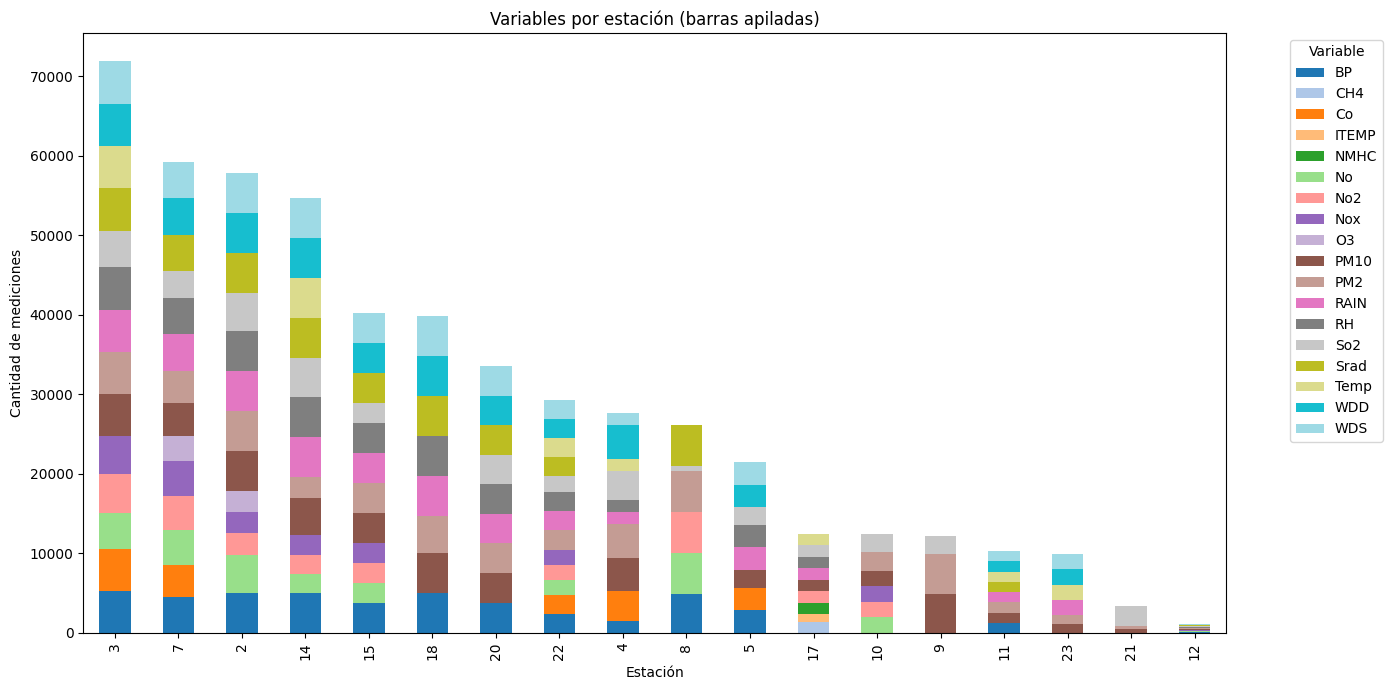

In [25]:
# Crear tabla: filas = estación, columnas = variable, valores = conteo
pivot = df_contaminacion_full.pivot_table(
    index="station",
    columns="variable",
    values="value",
    aggfunc="count",
    fill_value=0
)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14,7))
pivot.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Variables por estación (barras apiladas)")
plt.xlabel("Estación")
plt.ylabel("Cantidad de mediciones")
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Clasificación y limpieza de variables

Primero identifiquemos qué mide cada variable y eliminemos valores ilógicos:
- **Contaminantes de interés principal** (para calidad del aire):
  - PM10, PM2 (Material particulado - µg/m³)
  - O3 (Ozono - ppb)
  - NO2, NO, NOx (Óxidos de nitrógeno - ppb)
  - SO2 (Dióxido de azufre - ppb)
  - CO (Monóxido de carbono - ppm)
  
- **Variables meteorológicas** (contexto ambiental):
  - Temp (Temperatura - °C)
  - RH (Humedad relativa - %)
  - WDD (Dirección del viento - grados)
  - WDS (Velocidad del viento - m/s)
  - BP (Presión barométrica - hPa)
  - RAIN (Precipitación - mm)
  - Srad (Radiación solar - W/m²)
  
- **Variables secundarias** (menos relevantes para María):
  - NMHC (Hidrocarburos no metánicos)
  - CH4 (Metano)
  - ITEMP (Temperatura interna - sensor)

In [26]:
# Definir rangos válidos para cada variable (basados en estándares y lógica física)
rangos_validos = {
    # Contaminantes principales
    'PM10': (0, 600),      # µg/m³ - valores extremos pueden llegar a 600 en episodios severos
    'PM2': (0, 500),       # µg/m³
    'O3': (0, 300),        # ppb
    'NO2': (0, 500),       # ppb
    'NO': (0, 500),        # ppb
    'Nox': (0, 1000),      # ppb (suma de NO y NO2)
    'So2': (0, 500),       # ppb
    'Co': (0, 50),         # ppm
    
    # Variables meteorológicas
    'Temp': (-10, 50),     # °C (rango razonable para Cundinamarca)
    'ITEMP': (-10, 60),    # °C (temperatura interna del sensor, puede ser más alta)
    'RH': (0, 100),        # % humedad relativa
    'WDD': (0, 360),       # grados
    'WDS': (0, 50),        # m/s velocidad del viento
    'BP': (600, 800),      # hPa presión barométrica (Bogotá está a ~2600m)
    'RAIN': (0, 100),      # mm por hora
    'Srad': (0, 1500),     # W/m² radiación solar
    
    # Otros gases
    'NMHC': (0, 5000),     # ppb
    'CH4': (0, 10),        # ppm
}

# Identificar y contar valores fuera de rango
print("=== ANÁLISIS DE VALORES ANÓMALOS ===\n")
df_clean = df_contaminacion_full.copy()

for variable, (min_val, max_val) in rangos_validos.items():
    if variable in df_clean['variable'].unique():
        mask = df_clean['variable'] == variable
        total = mask.sum()
        fuera_rango = ((df_clean.loc[mask, 'value'] < min_val) | 
                       (df_clean.loc[mask, 'value'] > max_val)).sum()
        
        if fuera_rango > 0:
            pct = (fuera_rango / total) * 100
            print(f"{variable:8s}: {fuera_rango:6d} valores anómalos ({pct:.2f}%) de {total} total")
            # Mostrar algunos ejemplos
            ejemplos = df_clean.loc[mask & ((df_clean['value'] < min_val) | 
                                             (df_clean['value'] > max_val)), 'value'].head(3).values
            print(f"           Ejemplos: {ejemplos}")

# Eliminar valores fuera de rango
print("\n=== LIMPIEZA DE DATOS ===\n")
filas_antes = len(df_clean)

for variable, (min_val, max_val) in rangos_validos.items():
    if variable in df_clean['variable'].unique():
        mask = (df_clean['variable'] == variable) & \
               ((df_clean['value'] < min_val) | (df_clean['value'] > max_val))
        df_clean = df_clean[~mask]

filas_despues = len(df_clean)
filas_eliminadas = filas_antes - filas_despues
pct_eliminado = (filas_eliminadas / filas_antes) * 100

print(f"Filas antes de limpieza: {filas_antes:,}")
print(f"Filas después de limpieza: {filas_despues:,}")
print(f"Filas eliminadas: {filas_eliminadas:,} ({pct_eliminado:.2f}%)")

# Verificar valores negativos restantes
negativos = df_clean[df_clean['value'] < 0].groupby('variable').size()
if len(negativos) > 0:
    print("\n⚠️ Variables con valores negativos restantes:")
    print(negativos)

=== ANÁLISIS DE VALORES ANÓMALOS ===

PM10    :   2311 valores anómalos (4.68%) de 49336 total
           Ejemplos: [985. 985. 985.]
PM2     :   4815 valores anómalos (9.39%) de 51269 total
           Ejemplos: [9999. 9999. 9999.]
O3      :     12 valores anómalos (0.21%) de 5703 total
           Ejemplos: [  302.448395   464.097595 13495.375977]
So2     :   2485 valores anómalos (6.10%) de 40717 total
           Ejemplos: [9999. 9999. 9999.]
Co      :  18053 valores anómalos (98.84%) de 18265 total
           Ejemplos: [211.671967 699.301514 219.0784  ]
ITEMP   :    640 valores anómalos (68.74%) de 931 total
           Ejemplos: [128.1224 365.5672 395.3632]
BP      :  37888 valores anómalos (83.09%) de 45601 total
           Ejemplos: [565.8189 565.1462 566.8448]
RAIN    :   1583 valores anómalos (3.59%) de 44104 total
           Ejemplos: [259.4751 324.6658 579.6559]

=== LIMPIEZA DE DATOS ===

BP      :  37888 valores anómalos (83.09%) de 45601 total
           Ejemplos: [565.8189 5

### Visualización 1: Serie temporal de contaminantes principales

Esta visualización permite a María explorar cómo varían los contaminantes clave a lo largo del tiempo en diferentes estaciones. Puede identificar patrones temporales, picos de contaminación y comparar entre estaciones.

In [27]:
# Seleccionar contaminantes principales para análisis
contaminantes_principales = ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']

# Filtrar datos de contaminantes principales
df_contaminantes = df_clean[df_clean['variable'].isin(contaminantes_principales)].copy()

# Agregar por día para reducir volumen y suavizar tendencias
df_contaminantes['date'] = df_contaminantes['date_time'].dt.date
df_daily = df_contaminantes.groupby(['date', 'variable', 'station'])['value'].agg(['mean', 'max']).reset_index()

# Convertir date de vuelta a datetime para plotly
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Crear visualización interactiva con plotly
fig_series = px.line(
    df_daily,
    x='date',
    y='mean',
    color='variable',
    facet_col='station',
    facet_col_wrap=3,
    title='Evolución Temporal de Contaminantes Principales por Estación (Promedios Diarios)',
    labels={
        'mean': 'Concentración promedio',
        'date': 'Fecha',
        'variable': 'Contaminante',
        'station': 'Estación'
    },
    height=1000
)

fig_series.update_xaxes(title_text='')
fig_series.update_yaxes(title_text='')
fig_series.add_annotation(
    text='Concentración',
    xref='paper',
    yref='paper',
    x=-0.07,
    y=0.5,
    showarrow=False,
    textangle=-90,
    font=dict(size=12)
)

fig_series.update_layout(
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig_series.show()

print(f"\n📊 Datos procesados:")
print(f"   - Período: {df_daily['date'].min().date()} a {df_daily['date'].max().date()}")
print(f"   - Estaciones con datos: {sorted(df_daily['station'].unique())}")
print(f"   - Días de medición: {df_daily['date'].nunique()}")


📊 Datos procesados:
   - Período: 2024-01-01 a 2025-05-27
   - Estaciones con datos: [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 20, 21, 22, 23]
   - Días de medición: 261


### Visualización 2: Mapa de calor - Concentraciones promedio por estación

Permite a María comparar rápidamente qué estaciones tienen las mayores concentraciones de cada contaminante. Ideal para identificar zonas críticas.

In [28]:
# Calcular promedios por estación y contaminante
heatmap_data = df_contaminantes.groupby(['station', 'variable'])['value'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='station', columns='variable', values='value')

# Crear heatmap con plotly
fig_heatmap = px.imshow(
    heatmap_pivot,
    labels=dict(x="Contaminante", y="Estación", color="Concentración promedio"),
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    color_continuous_scale='YlOrRd',
    aspect='auto',
    title='Concentraciones Promedio de Contaminantes por Estación'
)

fig_heatmap.update_xaxes(side="bottom")
fig_heatmap.update_layout(
    height=600,
    width=800
)

fig_heatmap.show()

# Identificar estaciones más contaminadas por cada variable
print("\n🎯 Estaciones con mayores concentraciones promedio:\n")
for contaminante in contaminantes_principales:
    if contaminante in heatmap_pivot.columns:
        top_station = heatmap_pivot[contaminante].idxmax()
        top_value = heatmap_pivot[contaminante].max()
        print(f"{contaminante:6s}: Estación {top_station} ({top_value:.2f})")


🎯 Estaciones con mayores concentraciones promedio:

PM10  : Estación 4 (64.06)
PM2   : Estación 22 (50.06)
O3    : Estación 7 (32.58)
So2   : Estación 4 (36.89)


### Visualización 3: Distribución horaria de contaminantes

María puede explorar patrones circadianos: ¿A qué horas del día son más altos los niveles de contaminación? Esto puede correlacionarse con tráfico vehicular y actividad industrial.

In [29]:
# Extraer hora del día
df_contaminantes['hour'] = df_contaminantes['date_time'].dt.hour

# Calcular promedio por hora para cada contaminante
df_hourly = df_contaminantes.groupby(['hour', 'variable'])['value'].mean().reset_index()

# Crear visualización de patrones horarios
fig_hourly = px.line(
    df_hourly,
    x='hour',
    y='value',
    color='variable',
    markers=True,
    title='Patrones Horarios de Contaminantes (Promedio de todas las estaciones)',
    labels={
        'hour': 'Hora del día',
        'value': 'Concentración promedio',
        'variable': 'Contaminante'
    },
    height=500
)

fig_hourly.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=2
    ),
    hovermode='x unified'
)

fig_hourly.show()

# Identificar horas pico para cada contaminante
print("\n⏰ Horas con mayores concentraciones promedio:\n")
for contaminante in contaminantes_principales:
    df_temp = df_hourly[df_hourly['variable'] == contaminante]
    if len(df_temp) > 0:
        peak_hour = df_temp.loc[df_temp['value'].idxmax(), 'hour']
        peak_value = df_temp['value'].max()
        print(f"{contaminante:6s}: {int(peak_hour)}:00 hrs ({peak_value:.2f})")


⏰ Horas con mayores concentraciones promedio:

PM10  : 8:00 hrs (50.72)
PM2   : 7:00 hrs (27.88)
O3    : 14:00 hrs (30.92)
So2   : 8:00 hrs (18.82)


### Visualización 5: Mapa geográfico interactivo con niveles de contaminación

Combinación poderosa: mapa que muestre las estaciones coloreadas según niveles promedio de un contaminante seleccionado. María puede explorar la distribución espacial de la contaminación.

In [31]:
# Calcular promedios por estación para cada contaminante
station_averages = df_contaminantes.groupby(['station', 'variable'])['value'].mean().reset_index()

# Merge con coordenadas de estaciones
station_pollution = station_averages.merge(
    air_stations[['id', 'latitude', 'longitude', 'state']],
    left_on='station',
    right_on='id',
    how='left'
)

# Crear un mapa para cada contaminante principal
for contaminante in contaminantes_principales:
    df_map = station_pollution[station_pollution['variable'] == contaminante].copy()
    
    if len(df_map) > 0:
        # Determinar escala de colores según el contaminante
        max_val = df_map['value'].max()
        
        fig_map = px.scatter_map(
            df_map,
            lat='latitude',
            lon='longitude',
            size='value',
            color='value',
            hover_name='station',
            hover_data={
                'value': ':.2f',
                'state': True,
                'latitude': False,
                'longitude': False
            },
            color_continuous_scale='YlOrRd',
            size_max=25,
            zoom=8,
            height=600,
            title=f'Distribución Geográfica de {contaminante} - Concentración Promedio'
        )
        
        fig_map.update_layout(
            map_style="open-street-map",
            margin={"r":0,"t":50,"l":0,"b":0}
        )
        
        fig_map.show()
        
        print(f"\n📍 {contaminante} - Estadísticas por ubicación:")
        print(f"   Estación con mayor nivel: {df_map.loc[df_map['value'].idxmax(), 'station']} "
              f"({df_map['value'].max():.2f})")
        print(f"   Estación con menor nivel: {df_map.loc[df_map['value'].idxmin(), 'station']} "
              f"({df_map['value'].min():.2f})")
        print(f"   Promedio regional: {df_map['value'].mean():.2f}\n")
        print("-" * 60)


📍 PM10 - Estadísticas por ubicación:
   Estación con mayor nivel: 4 (64.06)
   Estación con menor nivel: 7 (17.87)
   Promedio regional: 34.71

------------------------------------------------------------



📍 PM10 - Estadísticas por ubicación:
   Estación con mayor nivel: 4 (64.06)
   Estación con menor nivel: 7 (17.87)
   Promedio regional: 34.71

------------------------------------------------------------



📍 PM2 - Estadísticas por ubicación:
   Estación con mayor nivel: 22 (50.06)
   Estación con menor nivel: 10 (10.37)
   Promedio regional: 20.05

------------------------------------------------------------



📍 PM10 - Estadísticas por ubicación:
   Estación con mayor nivel: 4 (64.06)
   Estación con menor nivel: 7 (17.87)
   Promedio regional: 34.71

------------------------------------------------------------



📍 PM2 - Estadísticas por ubicación:
   Estación con mayor nivel: 22 (50.06)
   Estación con menor nivel: 10 (10.37)
   Promedio regional: 20.05

------------------------------------------------------------



📍 PM10 - Estadísticas por ubicación:
   Estación con mayor nivel: 4 (64.06)
   Estación con menor nivel: 7 (17.87)
   Promedio regional: 34.71

------------------------------------------------------------



📍 PM2 - Estadísticas por ubicación:
   Estación con mayor nivel: 22 (50.06)
   Estación con menor nivel: 10 (10.37)
   Promedio regional: 20.05

------------------------------------------------------------



📍 O3 - Estadísticas por ubicación:
   Estación con mayor nivel: 7 (32.58)
   Estación con menor nivel: 2 (5.52)
   Promedio regional: 19.05

------------------------------------------------------------



📍 So2 - Estadísticas por ubicación:
   Estación con mayor nivel: 4 (36.89)
   Estación con menor nivel: 2 (3.94)
   Promedio regional: 14.94

------------------------------------------------------------


### Visualización 7: Mapa combinado - Estaciones + Industrias + Niveles de contaminación

Esta es la visualización integradora clave. Muestra simultáneamente:
- Estaciones de medición (tamaño/color según nivel de contaminante)
- Industrias cercanas (verdes) y lejanas (naranjas)
- Permite a María explorar si hay correlación espacial entre industrias y contaminación

In [32]:
# Seleccionar un contaminante clave para el análisis integrado (ej: PM10)
contaminante_analisis = 'PM10'

# Obtener niveles promedio de PM10 por estación
pm10_stations = station_pollution[station_pollution['variable'] == contaminante_analisis].copy()
pm10_stations['tipo'] = 'Estación de Medición'
pm10_stations['display_name'] = 'Estación ' + pm10_stations['station'].astype(str)

# Preparar datos de industrias (usar seguimiento_validos del análisis anterior)
industrias_cercanas = seguimiento_validos[seguimiento_validos['cercana_a_estacion'] == True].copy()
industrias_cercanas['tipo'] = f'Industria cercana (≤{RANGO_KM}km)'
industrias_cercanas['display_name'] = industrias_cercanas['IDExpediente'].astype(str)
industrias_cercanas['value'] = 5  # No tienen valor de contaminación

industrias_lejanas = seguimiento_validos[seguimiento_validos['cercana_a_estacion'] == False].copy()
industrias_lejanas['tipo'] = f'Industria lejana (>{RANGO_KM}km)'
industrias_lejanas['display_name'] = industrias_lejanas['IDExpediente'].astype(str)
industrias_lejanas['value'] = 5

# Combinar datos
combined_map = pd.concat([
    pm10_stations[['latitude', 'longitude', 'value', 'tipo', 'display_name', 'state']].rename(columns={'state': 'info'}),
    industrias_cercanas[['latitude', 'longitude', 'value', 'tipo', 'display_name', 'Municipio']].rename(columns={'Municipio': 'info'}),
    industrias_lejanas[['latitude', 'longitude', 'value', 'tipo', 'display_name', 'Municipio']].rename(columns={'Municipio': 'info'})
], ignore_index=True)

# Crear mapa integrado
fig_integrated = px.scatter_map(
    combined_map,
    lat='latitude',
    lon='longitude',
    color='tipo',
    size='value',
    size_max=20,
    hover_name='display_name',
    hover_data={
        'info': True,
        'value': ':.2f',
        'latitude': False,
        'longitude': False,
        'tipo': False
    },
    color_discrete_map={
        'Estación de Medición': 'red',
        f'Industria cercana (≤{RANGO_KM}km)': 'green',
        f'Industria lejana (>{RANGO_KM}km)': 'orange'
    },
    zoom=8,
    height=700,
    title=f'Mapa Integrado: Estaciones (con niveles de {contaminante_analisis}) + Industrias'
)

fig_integrated.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0},
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255, 255, 255, 0.9)"
    )
)

fig_integrated.show()

print(f"\n Análisis espacial integrado:")
print(f"   - Contaminante mostrado: {contaminante_analisis}")
print(f"   - Estaciones con datos: {len(pm10_stations)}")
print(f"   - Industrias cercanas a estaciones: {len(industrias_cercanas)}")
print(f"   - Industrias lejanas: {len(industrias_lejanas)}")
print(f"   - Nivel promedio de {contaminante_analisis}: {pm10_stations['value'].mean():.2f}")


 Análisis espacial integrado:
   - Contaminante mostrado: PM10
   - Estaciones con datos: 16
   - Industrias cercanas a estaciones: 134
   - Industrias lejanas: 74
   - Nivel promedio de PM10: 34.71


### Resumen de variables recomendadas para el dashboard

**Variables principales a mantener para María:**

1. **Contaminantes críticos (prioritarios):**
   - `PM10` y `PM2`: Material particulado - impacto directo en salud respiratoria
   - `O3`: Ozono - irritante respiratorio
   - `NO2`: Indicador de tráfico y combustión
   - `CO`: Monóxido de carbono - emisiones vehiculares
   
2. **Variables contextuales meteorológicas:**
   - `Temp`: Temperatura - afecta formación de ozono
   - `RH`: Humedad - influye en dispersión de contaminantes
   - `WDD` y `WDS`: Dirección y velocidad del viento - dispersión
   - `RAIN`: Precipitación - limpieza atmosférica
   
3. **Variables secundarias (opcionales):**
   - `SO2`: Menos común pero importante en zonas industriales
   - `NOx`: Óxidos de nitrógeno totales
   - `BP`: Presión barométrica
   
**Variables a omitir:**
- `NMHC`, `CH4`, `ITEMP`, `Srad`: Menos relevantes para análisis de calidad del aire urbano y toma de decisiones de María

### Exportar datos limpios para Tableau

Preparamos datasets optimizados para importar a Tableau:

In [33]:
# 1. Dataset de contaminación limpio (solo variables principales)
variables_dashboard = ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2', 'Temp', 'RH', 'WDD', 'WDS', 'RAIN']
df_export = df_clean[df_clean['variable'].isin(variables_dashboard)].copy()

# Merge con información de estaciones
df_export = df_export.merge(
    air_stations[['id', 'latitude', 'longitude', 'state']],
    left_on='station',
    right_on='id',
    how='left'
)

df_export = df_export[['date_time', 'station', 'latitude', 'longitude', 'state', 'variable', 'value']]
df_export.to_csv('data/contaminacion_limpia.csv', index=False)
print(f" Exportado: contaminacion_limpia.csv ({len(df_export):,} registros)")

# 2. Dataset agregado diario (más liviano para Tableau)
df_daily_export = df_export.copy()
df_daily_export['date'] = df_daily_export['date_time'].dt.date
df_daily_agg = df_daily_export.groupby(['date', 'station', 'latitude', 'longitude', 'state', 'variable'])['value'].agg(['mean', 'max', 'min', 'std']).reset_index()
df_daily_agg.to_csv('data/contaminacion_diaria.csv', index=False)
print(f" Exportado: contaminacion_diaria.csv ({len(df_daily_agg):,} registros)")

# 3. Dataset de industrias procesado
emission_permits.to_csv('data/industrias_procesadas.csv', index=False)
print(f" Exportado: industrias_procesadas.csv ({len(emission_permits):,} registros)")

# 4. Dataset de promedios por estación (para mapas rápidos)
station_summary = df_export.groupby(['station', 'latitude', 'longitude', 'state', 'variable'])['value'].mean().reset_index()
station_summary.columns = ['station', 'latitude', 'longitude', 'state', 'variable', 'avg_value']
station_summary.to_csv('data/estaciones_promedios.csv', index=False)
print(f" Exportado: estaciones_promedios.csv ({len(station_summary):,} registros)")

print("\n Datasets listos para importar a Tableau:")

 Exportado: contaminacion_limpia.csv (327,736 registros)
 Exportado: contaminacion_diaria.csv (16,489 registros)
 Exportado: industrias_procesadas.csv (536 registros)
 Exportado: estaciones_promedios.csv (106 registros)

 Datasets listos para importar a Tableau:


In [46]:
# =============================================================================
# CONFIGURACION DE PARAMETROS PARA VISUALIZACIONES FINALES
# =============================================================================

# Parametros de Visualizaciones de Alta Jerarquia
FILTRO_ESTADO = None  # Opciones: None, 'Sancionatorio', 'Seguimiento y Control', 'En Tramite'
FILTRO_TIPO_COMBUSTIBLE = None  # Opciones: None, o valor especifico de TipoCombustible
FILTRO_TIPO_FUENTE_EMISION = None  # Opciones: None, o valor especifico de TipoFuenteEmision
FILTRO_CUENCA = None  # Opciones: None, o valor especifico de Cuenca
CONTAMINANTE_MAPA = 'PM10'  # Contaminante para colorear estaciones en mapa integrado

# Parametros de Visualizaciones de Baja Jerarquia
ESTACION_SELECCIONADA = 2  # Estacion por defecto
CONTAMINANTES_SELECCIONADOS = ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']  # Todos por defecto
PERIODO_SELECCIONADO = '2024-S1'  # Opciones: '2024-S1' o '2025-S1'

# Radio de cercania para industrias (km)
RADIO_CERCANIA_KM = 5

In [47]:
# =============================================================================
# PREPARACION DE DATOS BASE PARA TODAS LAS VISUALIZACIONES
# =============================================================================

# Contaminantes principales para el dashboard
CONTAMINANTES_PRINCIPALES = ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2', 'Temp', 'RH', 'WDD', 'WDS', 'RAIN']

# Filtrar datos de contaminacion con solo contaminantes principales
df_contaminantes_principales = df_clean[df_clean['variable'].isin(CONTAMINANTES_PRINCIPALES)].copy()

# Agregar informacion de estaciones
df_contaminantes_principales = df_contaminantes_principales.merge(
    air_stations[['id', 'latitude', 'longitude', 'state']],
    left_on='station',
    right_on='id',
    how='left'
).drop(columns=['id'])

# Calcular promedios por estacion y variable para el mapa
station_averages_all = df_contaminantes_principales.groupby(['station', 'variable', 'latitude', 'longitude', 'state'])['value'].mean().reset_index()
station_averages_all.rename(columns={'value': 'avg_value'}, inplace=True)

# Preparar datos de industrias con distancias a estaciones
def calcular_distancia_haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1_rad = np.radians(lat1)
    lat2_rad = np.radians(lat2)
    delta_lat = np.radians(lat2 - lat1)
    delta_lon = np.radians(lon2 - lon1)
    a = np.sin(delta_lat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Agregar informacion de cercania a estaciones para cada industria
emission_permits['estacion_cercana_1'] = ''
emission_permits['distancia_cercana_1'] = np.inf
emission_permits['estacion_cercana_2'] = ''
emission_permits['distancia_cercana_2'] = np.inf
emission_permits['es_cercana'] = False

for idx, industria in emission_permits.iterrows():
    distancias = []
    for _, estacion in air_stations.iterrows():
        dist = calcular_distancia_haversine(
            industria['latitude'], industria['longitude'],
            estacion['latitude'], estacion['longitude']
        )
        distancias.append((dist, estacion['id']))
    
    distancias.sort()
    
    if len(distancias) >= 1:
        emission_permits.at[idx, 'distancia_cercana_1'] = round(distancias[0][0], 2)
        emission_permits.at[idx, 'estacion_cercana_1'] = int(distancias[0][1])
    
    if len(distancias) >= 2:
        emission_permits.at[idx, 'distancia_cercana_2'] = round(distancias[1][0], 2)
        emission_permits.at[idx, 'estacion_cercana_2'] = int(distancias[1][1])
    
    if distancias[0][0] <= RADIO_CERCANIA_KM:
        emission_permits.at[idx, 'es_cercana'] = True

print(f"Datos preparados: {len(df_contaminantes_principales):,} registros de contaminacion")
print(f"Estaciones: {df_contaminantes_principales['station'].nunique()}")
print(f"Industrias: {len(emission_permits)}")
print(f"Industrias cercanas a estaciones (<={RADIO_CERCANIA_KM}km): {emission_permits['es_cercana'].sum()}")
print(f"Industrias lejanas: {(~emission_permits['es_cercana']).sum()}")

Datos preparados: 327,736 registros de contaminacion
Estaciones: 18
Industrias: 536
Industrias cercanas a estaciones (<=5km): 303
Industrias lejanas: 233


In [48]:
# =============================================================================
# VISUALIZACION 1: MAPA INTEGRADO (Alta Jerarquia)
# Estaciones coloreadas por nivel de contaminante + Industrias coloreadas por estado
# =============================================================================

# Filtrar industrias segun parametros
industrias_filtradas = emission_permits.copy()

if FILTRO_ESTADO is not None:
    industrias_filtradas = industrias_filtradas[industrias_filtradas['Estado'] == FILTRO_ESTADO]

if FILTRO_TIPO_COMBUSTIBLE is not None:
    industrias_filtradas = industrias_filtradas[industrias_filtradas['TipoCombustible'] == FILTRO_TIPO_COMBUSTIBLE]

if FILTRO_TIPO_FUENTE_EMISION is not None:
    industrias_filtradas = industrias_filtradas[industrias_filtradas['TipoFuenteEmision'] == FILTRO_TIPO_FUENTE_EMISION]

if FILTRO_CUENCA is not None:
    industrias_filtradas = industrias_filtradas[industrias_filtradas['Cuenca'] == FILTRO_CUENCA]

# Obtener datos de estaciones con el contaminante seleccionado
estaciones_contaminante = station_averages_all[station_averages_all['variable'] == CONTAMINANTE_MAPA].copy()

# Obtener todos los contaminantes por estacion para el tooltip
station_contaminantes = {}
for station_id in estaciones_contaminante['station'].unique():
    contaminantes_dict = {}
    station_data = station_averages_all[station_averages_all['station'] == station_id]
    for _, row in station_data.iterrows():
        contaminantes_dict[row['variable']] = round(row['avg_value'], 2)
    station_contaminantes[int(station_id)] = contaminantes_dict

# Preparar datos para visualizacion - Estaciones
df_estaciones_viz1 = estaciones_contaminante.copy()
df_estaciones_viz1['tipo'] = 'estacion'
df_estaciones_viz1['marker'] = 'circle'
df_estaciones_viz1['color_value'] = df_estaciones_viz1['avg_value']

# Preparar datos para visualizacion - Industrias
df_industrias_viz1 = industrias_filtradas.copy()
df_industrias_viz1['tipo'] = 'industria'
df_industrias_viz1['marker'] = 'triangle'
df_industrias_viz1['color_value'] = 0
df_industrias_viz1['variable'] = df_industrias_viz1['Estado']

# Combinar datos
df_viz1_combined = pd.concat([
    df_estaciones_viz1[['latitude', 'longitude', 'tipo', 'marker', 'color_value', 'variable', 'station', 'state']],
    df_industrias_viz1[['latitude', 'longitude', 'tipo', 'marker', 'color_value', 'variable', 'IDExpediente', 'Regional', 'Departamento', 'Municipio', 'TipoCombustible', 'TipoFuenteEmision', 'Cuenca', 'Estado', 'estacion_cercana_1', 'distancia_cercana_1', 'estacion_cercana_2', 'distancia_cercana_2']]
], ignore_index=True)

# Crear mapa
fig_viz1 = px.scatter_map(
    df_estaciones_viz1,
    lat='latitude',
    lon='longitude',
    color='avg_value',
    color_continuous_scale='YlOrRd',
    hover_name='station',
    hover_data={
        'latitude': False,
        'longitude': False,
        'avg_value': ':.2f',
        'state': True
    },
    zoom=8,
    height=700,
    title=f'Mapa Integrado: Estaciones ({CONTAMINANTE_MAPA}) + Industrias'
)

# Agregar industrias por estado
color_map_estado = {
    'Sancionatorio': 'red',
    'Seguimiento y Control': 'green',
    'En Trámite': 'black'
}

for estado in df_industrias_viz1['Estado'].unique():
    df_estado = df_industrias_viz1[df_industrias_viz1['Estado'] == estado]
    fig_viz1.add_scattermap(
        lat=df_estado['latitude'],
        lon=df_estado['longitude'],
        mode='markers',
        marker=dict(size=10, color=color_map_estado.get(estado, 'gray'), symbol='triangle'),
        name=estado,
        hovertemplate='<b>%{customdata[0]}</b><br>' +
                      'Regional: %{customdata[1]}<br>' +
                      'Departamento: %{customdata[2]}<br>' +
                      'Municipio: %{customdata[3]}<br>' +
                      'TipoCombustible: %{customdata[4]}<br>' +
                      'TipoFuenteEmision: %{customdata[5]}<br>' +
                      'Cuenca: %{customdata[6]}<br>' +
                      'Estacion cercana 1: %{customdata[7]} (%{customdata[8]} km)<br>' +
                      'Estacion cercana 2: %{customdata[9]} (%{customdata[10]} km)<extra></extra>',
        customdata=df_estado[['IDExpediente', 'Regional', 'Departamento', 'Municipio', 
                               'TipoCombustible', 'TipoFuenteEmision', 'Cuenca',
                               'estacion_cercana_1', 'distancia_cercana_1',
                               'estacion_cercana_2', 'distancia_cercana_2']].values
    )

fig_viz1.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0},
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255, 255, 255, 0.9)"
    )
)

fig_viz1.show()

print(f"Visualizacion 1: Mapa Integrado")
print(f"  Estaciones mostradas: {len(estaciones_contaminante)}")
print(f"  Industrias mostradas: {len(industrias_filtradas)}")
print(f"  Contaminante en estaciones: {CONTAMINANTE_MAPA}")

Visualizacion 1: Mapa Integrado
  Estaciones mostradas: 16
  Industrias mostradas: 536
  Contaminante en estaciones: PM10


In [49]:
# =============================================================================
# VISUALIZACION 2: HEATMAP DE CONCENTRACIONES PROMEDIO POR ESTACION
# (Alta Jerarquia - No afectada por filtros)
# =============================================================================

# Calcular concentraciones promedio por estacion para contaminantes principales
contaminantes_heatmap = ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']
df_heatmap = station_averages_all[station_averages_all['variable'].isin(contaminantes_heatmap)].copy()

# Crear pivot para heatmap
heatmap_pivot = df_heatmap.pivot(index='station', columns='variable', values='avg_value')

# Ordenar por total de contaminacion
heatmap_pivot = heatmap_pivot.loc[heatmap_pivot.sum(axis=1).sort_values(ascending=False).index]

# Crear heatmap
fig_viz2 = px.imshow(
    heatmap_pivot,
    labels=dict(x="Contaminante", y="Estacion", color="Concentracion promedio"),
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    color_continuous_scale='YlOrRd',
    aspect='auto',
    title='Concentraciones Promedio de Contaminantes por Estacion'
)

fig_viz2.update_xaxes(side="bottom")
fig_viz2.update_layout(
    height=600,
    width=900
)

fig_viz2.show()

print(f"Visualizacion 2: Heatmap de Concentraciones")
print(f"  Estaciones: {len(heatmap_pivot)}")
print(f"  Contaminantes: {list(heatmap_pivot.columns)}")

# Identificar estaciones mas contaminadas por variable
print("\nEstaciones con mayores concentraciones promedio:")
for contaminante in heatmap_pivot.columns:
    top_station = heatmap_pivot[contaminante].idxmax()
    top_value = heatmap_pivot[contaminante].max()
    print(f"  {contaminante}: Estacion {top_station} ({top_value:.2f})")

Visualizacion 2: Heatmap de Concentraciones
  Estaciones: 18
  Contaminantes: ['O3', 'PM10', 'PM2', 'So2']

Estaciones con mayores concentraciones promedio:
  O3: Estacion 7 (32.58)
  PM10: Estacion 4 (64.06)
  PM2: Estacion 22 (50.06)
  So2: Estacion 4 (36.89)


In [50]:
# =============================================================================
# VISUALIZACION 3: EVOLUCION TEMPORAL DE CONTAMINANTES POR ESTACION
# (Baja Jerarquia - Filtrada por estacion, contaminantes y periodo)
# =============================================================================

# Definir periodos
periodos = {
    '2024-S1': ('2024-01-01', '2024-06-30'),
    '2025-S1': ('2025-01-01', '2025-06-30')
}

inicio, fin = periodos[PERIODO_SELECCIONADO]

# Filtrar datos por estacion, contaminantes y periodo
df_evolucion = df_contaminantes_principales[
    (df_contaminantes_principales['station'] == ESTACION_SELECCIONADA) &
    (df_contaminantes_principales['variable'].isin(CONTAMINANTES_SELECCIONADOS)) &
    (df_contaminantes_principales['date_time'] >= inicio) &
    (df_contaminantes_principales['date_time'] <= fin)
].copy()

# Agregar por dia
df_evolucion['date'] = df_evolucion['date_time'].dt.date
df_evolucion_daily = df_evolucion.groupby(['date', 'variable'])['value'].mean().reset_index()
df_evolucion_daily['date'] = pd.to_datetime(df_evolucion_daily['date'])

# Crear visualizacion
fig_viz3 = px.line(
    df_evolucion_daily,
    x='date',
    y='value',
    color='variable',
    markers=True,
    title=f'Evolucion Temporal de Contaminantes - Estacion {ESTACION_SELECCIONADA} ({PERIODO_SELECCIONADO})',
    labels={
        'date': 'Fecha',
        'value': 'Concentracion promedio diaria',
        'variable': 'Contaminante'
    },
    height=500
)

fig_viz3.update_layout(
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig_viz3.show()

print(f"Visualizacion 3: Evolucion Temporal")
print(f"  Estacion: {ESTACION_SELECCIONADA}")
print(f"  Periodo: {PERIODO_SELECCIONADO} ({inicio} a {fin})")
print(f"  Contaminantes: {CONTAMINANTES_SELECCIONADOS}")
print(f"  Dias con datos: {df_evolucion_daily['date'].nunique()}")

Visualizacion 3: Evolucion Temporal
  Estacion: 2
  Periodo: 2024-S1 (2024-01-01 a 2024-06-30)
  Contaminantes: ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']
  Dias con datos: 121


In [51]:
# =============================================================================
# VISUALIZACION 4: PATRONES HORARIOS DE CONTAMINANTES POR ESTACION
# (Baja Jerarquia - Filtrada por estacion, contaminantes y periodo)
# =============================================================================

# Filtrar datos igual que en viz 3
df_horario = df_contaminantes_principales[
    (df_contaminantes_principales['station'] == ESTACION_SELECCIONADA) &
    (df_contaminantes_principales['variable'].isin(CONTAMINANTES_SELECCIONADOS)) &
    (df_contaminantes_principales['date_time'] >= inicio) &
    (df_contaminantes_principales['date_time'] <= fin)
].copy()

# Extraer hora del dia
df_horario['hour'] = df_horario['date_time'].dt.hour

# Calcular promedio por hora para cada contaminante
df_horario_agg = df_horario.groupby(['hour', 'variable'])['value'].mean().reset_index()

# Crear visualizacion
fig_viz4 = px.line(
    df_horario_agg,
    x='hour',
    y='value',
    color='variable',
    markers=True,
    title=f'Patrones Horarios de Contaminantes - Estacion {ESTACION_SELECCIONADA} ({PERIODO_SELECCIONADO})',
    labels={
        'hour': 'Hora del dia',
        'value': 'Concentracion promedio',
        'variable': 'Contaminante'
    },
    height=500
)

fig_viz4.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=2
    ),
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig_viz4.show()

print(f"Visualizacion 4: Patrones Horarios")
print(f"  Estacion: {ESTACION_SELECCIONADA}")
print(f"  Periodo: {PERIODO_SELECCIONADO}")
print(f"  Contaminantes: {CONTAMINANTES_SELECCIONADOS}")

# Identificar horas pico
print("\nHoras con mayores concentraciones promedio:")
for contaminante in CONTAMINANTES_SELECCIONADOS:
    df_temp = df_horario_agg[df_horario_agg['variable'] == contaminante]
    if len(df_temp) > 0:
        peak_hour = df_temp.loc[df_temp['value'].idxmax(), 'hour']
        peak_value = df_temp['value'].max()
        print(f"  {contaminante}: {int(peak_hour)}:00 hrs ({peak_value:.2f})")

Visualizacion 4: Patrones Horarios
  Estacion: 2
  Periodo: 2024-S1
  Contaminantes: ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']

Horas con mayores concentraciones promedio:
  PM10: 8:00 hrs (60.02)
  PM2: 7:00 hrs (38.41)
  O3: 13:00 hrs (11.74)
  So2: 10:00 hrs (5.00)


In [52]:
# =============================================================================
# VISUALIZACION 5: MAPA ESTATICO DE ESTACION SELECCIONADA + INDUSTRIAS
# (Baja Jerarquia - Centrado en estacion seleccionada, muestra industrias cercanas/lejanas)
# =============================================================================

# Obtener informacion de la estacion seleccionada
estacion_info = air_stations[air_stations['id'] == ESTACION_SELECCIONADA].iloc[0]

# Preparar datos de la estacion
df_estaciones_mapa = pd.DataFrame([{
    'latitude': estacion_info['latitude'],
    'longitude': estacion_info['longitude'],
    'station': estacion_info['id'],
    'state': estacion_info['state']
}])

# Calcular distancia de cada industria a la estacion seleccionada
emission_permits['distancia_estacion_sel'] = emission_permits.apply(
    lambda row: calcular_distancia_haversine(
        row['latitude'], row['longitude'],
        estacion_info['latitude'], estacion_info['longitude']
    ),
    axis=1
)

# Clasificar industrias como cercanas o lejanas
emission_permits['cercana_estacion_sel'] = emission_permits['distancia_estacion_sel'] <= RADIO_CERCANIA_KM

# Preparar datos de industrias
df_industrias_mapa = emission_permits.copy()
df_industrias_mapa['color_distancia'] = df_industrias_mapa['cercana_estacion_sel'].map({
    True: 'Cercana (<=' + str(RADIO_CERCANIA_KM) + 'km)',
    False: 'Lejana (>' + str(RADIO_CERCANIA_KM) + 'km)'
})

# Crear mapa centrado en la estacion
fig_viz5 = px.scatter_map(
    df_estaciones_mapa,
    lat='latitude',
    lon='longitude',
    hover_name='station',
    hover_data={'state': True, 'latitude': False, 'longitude': False},
    zoom=10,
    height=600,
    title=f'Mapa de Estacion {ESTACION_SELECCIONADA} e Industrias'
)

fig_viz5.update_traces(
    marker=dict(size=20, color='blue', symbol='star'),
    name=f'Estacion {ESTACION_SELECCIONADA}'
)

# Agregar industrias cercanas
color_map_distancia = {
    'Cercana (<=' + str(RADIO_CERCANIA_KM) + 'km)': 'green',
    'Lejana (>' + str(RADIO_CERCANIA_KM) + 'km)': 'orange'
}

for color_cat in df_industrias_mapa['color_distancia'].unique():
    df_dist = df_industrias_mapa[df_industrias_mapa['color_distancia'] == color_cat]
    fig_viz5.add_scattermap(
        lat=df_dist['latitude'],
        lon=df_dist['longitude'],
        mode='markers',
        marker=dict(size=8, color=color_map_distancia[color_cat], symbol='triangle'),
        name=color_cat,
        hovertemplate='<b>%{customdata[0]}</b><br>' +
                      'Estado: %{customdata[1]}<br>' +
                      'Regional: %{customdata[2]}<br>' +
                      'Departamento: %{customdata[3]}<br>' +
                      'Municipio: %{customdata[4]}<br>' +
                      'TipoCombustible: %{customdata[5]}<br>' +
                      'TipoFuenteEmision: %{customdata[6]}<br>' +
                      'Cuenca: %{customdata[7]}<br>' +
                      'Distancia a estacion: %{customdata[8]} km<extra></extra>',
        customdata=df_dist[['IDExpediente', 'Estado', 'Regional', 'Departamento', 'Municipio',
                            'TipoCombustible', 'TipoFuenteEmision', 'Cuenca', 'distancia_estacion_sel']].values
    )

fig_viz5.update_layout(
    map_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0},
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255, 255, 255, 0.9)"
    )
)

fig_viz5.show()

print(f"Visualizacion 5: Mapa de Estacion e Industrias")
print(f"  Estacion: {ESTACION_SELECCIONADA}")
print(f"  Ubicacion: {estacion_info['state']}")
print(f"  Coordenadas: ({estacion_info['latitude']:.4f}, {estacion_info['longitude']:.4f})")
print(f"  Industrias cercanas (<={RADIO_CERCANIA_KM}km): {emission_permits['cercana_estacion_sel'].sum()}")
print(f"  Industrias lejanas: {(~emission_permits['cercana_estacion_sel']).sum()}")

Visualizacion 5: Mapa de Estacion e Industrias
  Estacion: 2
  Ubicacion: ACT
  Coordenadas: (4.7333, -74.2662)
  Industrias cercanas (<=5km): 4
  Industrias lejanas: 532


In [53]:
# =============================================================================
# EXPORTACION DE DATOS PARA D3.JS
# =============================================================================

# 1. Estaciones con promedios de todos los contaminantes (para mapa integrado y viz 2)
estaciones_data = []
for station_id in air_stations['id'].unique():
    station_info = air_stations[air_stations['id'] == station_id].iloc[0]
    station_avg = station_averages_all[station_averages_all['station'] == station_id]
    
    estacion_dict = {
        'station_id': int(station_id),
        'latitude': float(station_info['latitude']),
        'longitude': float(station_info['longitude']),
        'state': station_info['state']
    }
    
    for _, row in station_avg.iterrows():
        estacion_dict[row['variable']] = round(float(row['avg_value']), 2)
    
    estaciones_data.append(estacion_dict)

df_estaciones_export = pd.DataFrame(estaciones_data)
df_estaciones_export.to_csv('data/estaciones_con_promedios.csv', index=False)
print(f"Exportado: estaciones_con_promedios.csv ({len(df_estaciones_export)} estaciones)")

# 2. Industrias con toda la informacion necesaria
df_industrias_export = emission_permits[[
    'IDExpediente', 'Estado', 'Regional', 'Departamento', 'Municipio', 'Vereda',
    'Class', 'TipoCombustible', 'TipoFuenteEmision', 'Cuenca',
    'latitude', 'longitude',
    'estacion_cercana_1', 'distancia_cercana_1',
    'estacion_cercana_2', 'distancia_cercana_2',
    'es_cercana'
]].copy()

df_industrias_export.to_csv('data/industrias_completo.csv', index=False)
print(f"Exportado: industrias_completo.csv ({len(df_industrias_export)} industrias)")

# 3. Datos de contaminacion por estacion, dia y contaminante (para viz 3)
df_evolucion_export = df_contaminantes_principales.copy()
df_evolucion_export['date'] = df_evolucion_export['date_time'].dt.date
df_evolucion_export['year'] = df_evolucion_export['date_time'].dt.year
df_evolucion_export['month'] = df_evolucion_export['date_time'].dt.month
df_evolucion_export['day'] = df_evolucion_export['date_time'].dt.day

df_evolucion_daily_export = df_evolucion_export.groupby(
    ['station', 'date', 'year', 'month', 'day', 'variable']
)['value'].mean().reset_index()
df_evolucion_daily_export.rename(columns={'value': 'avg_value'}, inplace=True)

df_evolucion_daily_export.to_csv('data/contaminacion_diaria_por_estacion.csv', index=False)
print(f"Exportado: contaminacion_diaria_por_estacion.csv ({len(df_evolucion_daily_export)} registros)")

# 4. Datos de contaminacion por estacion, hora y contaminante (para viz 4)
df_horario_export = df_contaminantes_principales.copy()
df_horario_export['hour'] = df_horario_export['date_time'].dt.hour
df_horario_export['year'] = df_horario_export['date_time'].dt.year
df_horario_export['month'] = df_horario_export['date_time'].dt.month

df_horario_hourly_export = df_horario_export.groupby(
    ['station', 'year', 'month', 'hour', 'variable']
)['value'].mean().reset_index()
df_horario_hourly_export.rename(columns={'value': 'avg_value'}, inplace=True)

df_horario_hourly_export.to_csv('data/contaminacion_horaria_por_estacion.csv', index=False)
print(f"Exportado: contaminacion_horaria_por_estacion.csv ({len(df_horario_hourly_export)} registros)")

# 5. Matriz para heatmap (viz 2)
heatmap_export = df_heatmap.pivot(index='station', columns='variable', values='avg_value').reset_index()
heatmap_export.to_csv('data/heatmap_estaciones_contaminantes.csv', index=False)
print(f"Exportado: heatmap_estaciones_contaminantes.csv ({len(heatmap_export)} estaciones)")

print("\nTodos los archivos exportados correctamente para D3.js")
print("Los archivos se encuentran en la carpeta 'data/'")
print("\nPara acceder desde D3, sube estos archivos a GitHub y usa el enlace raw:")

Exportado: estaciones_con_promedios.csv (23 estaciones)
Exportado: industrias_completo.csv (536 industrias)
Exportado: contaminacion_diaria_por_estacion.csv (16489 registros)
Exportado: contaminacion_horaria_por_estacion.csv (17210 registros)
Exportado: heatmap_estaciones_contaminantes.csv (18 estaciones)

Todos los archivos exportados correctamente para D3.js
Los archivos se encuentran en la carpeta 'data/'

Para acceder desde D3, sube estos archivos a GitHub y usa el enlace raw:


In [54]:
print("="*80)
print("RESUMEN DE DATOS EXPORTADOS PARA D3.JS")
print("="*80)
print()
print("ARCHIVOS GENERADOS:")
print()
print("1. estaciones_con_promedios.csv")
print("   Columnas: station_id, latitude, longitude, state, PM10, PM2, O3, NO2, CO, So2, etc.")
print("   Uso: Visualizacion 1 (Mapa Integrado) y Visualizacion 2 (Heatmap)")
print()
print("2. industrias_completo.csv")
print("   Columnas: IDExpediente, Estado, Regional, Departamento, Municipio, TipoCombustible,")
print("             TipoFuenteEmision, Cuenca, latitude, longitude, estacion_cercana_1,")
print("             distancia_cercana_1, estacion_cercana_2, distancia_cercana_2, es_cercana")
print("   Uso: Todas las visualizaciones que muestran industrias")
print()
print("3. contaminacion_diaria_por_estacion.csv")
print("   Columnas: station, date, year, month, day, variable, avg_value")
print("   Uso: Visualizacion 3 (Evolucion Temporal)")
print()
print("4. contaminacion_horaria_por_estacion.csv")
print("   Columnas: station, year, month, hour, variable, avg_value")
print("   Uso: Visualizacion 4 (Patrones Horarios)")
print()
print("5. heatmap_estaciones_contaminantes.csv")
print("   Columnas: station, O3, PM10, PM2, So2, etc.")
print("   Uso: Visualizacion 2 (Heatmap)")
print()
print("="*80)
print("ESTRUCTURA DE DATOS PARA D3")
print("="*80)
print()
print("VISUALIZACION 1 - Mapa Integrado:")
print("  - Estaciones: usar 'estaciones_con_promedios.csv'")
print("    * Marca: circulos")
print("    * Color: escala continua segun valor del contaminante seleccionado")
print("    * Tooltip: mostrar todos los contaminantes + station_id")
print("  - Industrias: usar 'industrias_completo.csv' con filtros")
print("    * Marca: triangulos")
print("    * Color: categorico segun 'Estado' (rojo=Sancionatorio, verde=Seguimiento, negro=Tramite)")
print("    * Tooltip: Regional, Departamento, TipoCombustible, TipoFuenteEmision, Cuenca, 2 estaciones cercanas")
print()
print("VISUALIZACION 2 - Heatmap:")
print("  - Usar 'heatmap_estaciones_contaminantes.csv'")
print("  - Filas: estaciones")
print("  - Columnas: contaminantes")
print("  - Color: escala continua YlOrRd")
print()
print("VISUALIZACION 3 - Evolucion Temporal:")
print("  - Usar 'contaminacion_diaria_por_estacion.csv'")
print("  - Filtrar por: station, year/month (segun periodo), variable (contaminantes seleccionados)")
print("  - Eje X: date (construir desde year, month, day)")
print("  - Eje Y: avg_value")
print("  - Lineas: una por contaminante")
print()
print("VISUALIZACION 4 - Patrones Horarios:")
print("  - Usar 'contaminacion_horaria_por_estacion.csv'")
print("  - Filtrar por: station, year/month (segun periodo), variable (contaminantes seleccionados)")
print("  - Eje X: hour (0-23)")
print("  - Eje Y: avg_value")
print("  - Lineas: una por contaminante")
print()
print("VISUALIZACION 5 - Mapa Estacion:")
print("  - Usar 'estaciones_con_promedios.csv' (filtrar por station_id)")
print("  - Usar 'industrias_completo.csv'")
print("  - Calcular distancia de cada industria a la estacion seleccionada en D3")
print("  - Colorear industrias: verde si distancia <= 5km, naranja si > 5km")
print("  - Centrar mapa en coordenadas de la estacion")
print()
print("="*80)
print("PARAMETROS CONFIGURABLES")
print("="*80)
print()
print("Alta Jerarquia:")
print("  - FILTRO_ESTADO: None | 'Sancionatorio' | 'Seguimiento y Control' | 'En Tramite'")
print("  - FILTRO_TIPO_COMBUSTIBLE: None | valor de TipoCombustible")
print("  - FILTRO_TIPO_FUENTE_EMISION: None | valor de TipoFuenteEmision")
print("  - FILTRO_CUENCA: None | valor de Cuenca")
print("  - CONTAMINANTE_MAPA: 'PM10' | 'PM2' | 'O3' | 'NO2' | 'CO' | 'So2'")
print()
print("Baja Jerarquia:")
print("  - ESTACION_SELECCIONADA: 2 (default) | ID de cualquier estacion")
print("  - CONTAMINANTES_SELECCIONADOS: ['PM10', 'PM2', 'O3', 'NO2', 'CO', 'So2']")
print("  - PERIODO_SELECCIONADO: '2024-S1' | '2025-S1'")
print("    * '2024-S1': 2024-01-01 a 2024-06-30")
print("    * '2025-S1': 2025-01-01 a 2025-06-30")
print("  - RADIO_CERCANIA_KM: 5 (default)")
print()
print("="*80)

RESUMEN DE DATOS EXPORTADOS PARA D3.JS

ARCHIVOS GENERADOS:

1. estaciones_con_promedios.csv
   Columnas: station_id, latitude, longitude, state, PM10, PM2, O3, NO2, CO, So2, etc.
   Uso: Visualizacion 1 (Mapa Integrado) y Visualizacion 2 (Heatmap)

2. industrias_completo.csv
   Columnas: IDExpediente, Estado, Regional, Departamento, Municipio, TipoCombustible,
             TipoFuenteEmision, Cuenca, latitude, longitude, estacion_cercana_1,
             distancia_cercana_1, estacion_cercana_2, distancia_cercana_2, es_cercana
   Uso: Todas las visualizaciones que muestran industrias

3. contaminacion_diaria_por_estacion.csv
   Columnas: station, date, year, month, day, variable, avg_value
   Uso: Visualizacion 3 (Evolucion Temporal)

4. contaminacion_horaria_por_estacion.csv
   Columnas: station, year, month, hour, variable, avg_value
   Uso: Visualizacion 4 (Patrones Horarios)

5. heatmap_estaciones_contaminantes.csv
   Columnas: station, O3, PM10, PM2, So2, etc.
   Uso: Visualizacion 

In [55]:
# Verificar estructura de archivos exportados
print("VERIFICACION DE ARCHIVOS EXPORTADOS")
print("="*80)
print()

# 1. Estaciones
df_test = pd.read_csv('data/estaciones_con_promedios.csv')
print("1. estaciones_con_promedios.csv")
print(f"   Filas: {len(df_test)}, Columnas: {len(df_test.columns)}")
print(f"   Columnas: {list(df_test.columns)}")
print(f"   Muestra:")
print(df_test.head(3))
print()

# 2. Industrias
df_test = pd.read_csv('data/industrias_completo.csv')
print("2. industrias_completo.csv")
print(f"   Filas: {len(df_test)}, Columnas: {len(df_test.columns)}")
print(f"   Columnas: {list(df_test.columns)}")
print(f"   Estados unicos: {df_test['Estado'].unique()}")
print()

# 3. Contaminacion diaria
df_test = pd.read_csv('data/contaminacion_diaria_por_estacion.csv')
print("3. contaminacion_diaria_por_estacion.csv")
print(f"   Filas: {len(df_test)}, Columnas: {len(df_test.columns)}")
print(f"   Estaciones: {sorted(df_test['station'].unique())}")
print(f"   Variables: {df_test['variable'].unique()}")
print(f"   Rango temporal: {df_test['year'].min()}-{df_test['month'].min():02d} a {df_test['year'].max()}-{df_test['month'].max():02d}")
print()

# 4. Contaminacion horaria
df_test = pd.read_csv('data/contaminacion_horaria_por_estacion.csv')
print("4. contaminacion_horaria_por_estacion.csv")
print(f"   Filas: {len(df_test)}, Columnas: {len(df_test.columns)}")
print(f"   Horas: {sorted(df_test['hour'].unique())}")
print()

# 5. Heatmap
df_test = pd.read_csv('data/heatmap_estaciones_contaminantes.csv')
print("5. heatmap_estaciones_contaminantes.csv")
print(f"   Filas: {len(df_test)}, Columnas: {len(df_test.columns)}")
print(f"   Columnas: {list(df_test.columns)}")
print()

print("="*80)
print("TODOS LOS ARCHIVOS VERIFICADOS CORRECTAMENTE")
print("="*80)

VERIFICACION DE ARCHIVOS EXPORTADOS

1. estaciones_con_promedios.csv
   Filas: 23, Columnas: 13
   Columnas: ['station_id', 'latitude', 'longitude', 'state', 'PM2', 'So2', 'PM10', 'RAIN', 'RH', 'WDD', 'WDS', 'Temp', 'O3']
   Muestra:
   station_id  latitude  longitude state    PM2    So2   PM10  RAIN     RH  \
0           8  4.530214 -74.142217   ACT  22.31  14.76    NaN   NaN    NaN   
1          18  4.940316 -73.970698   ACT  17.35    NaN  30.94  0.01  72.83   
2          20  5.200000 -73.883000   ACT  14.18  20.16  23.78  0.12  76.19   

      WDD   WDS  Temp  O3  
0     NaN   NaN   NaN NaN  
1  137.04  1.09   NaN NaN  
2  127.97  1.55   NaN NaN  

2. industrias_completo.csv
   Filas: 536, Columnas: 17
   Columnas: ['IDExpediente', 'Estado', 'Regional', 'Departamento', 'Municipio', 'Vereda', 'Class', 'TipoCombustible', 'TipoFuenteEmision', 'Cuenca', 'latitude', 'longitude', 'estacion_cercana_1', 'distancia_cercana_1', 'estacion_cercana_2', 'distancia_cercana_2', 'es_cercana']
   Est

In [56]:
print("="*80)
print("DESARROLLO COMPLETADO")
print("="*80)
print()
print("Se han creado las 5 visualizaciones solicitadas:")
print()
print("ALTA JERARQUIA:")
print("  1. Mapa Integrado - Estaciones (color por contaminante) + Industrias (color por estado)")
print("  2. Heatmap de Concentraciones - Matriz estaciones x contaminantes")
print()
print("BAJA JERARQUIA (Drill-down por estacion):")
print("  3. Evolucion Temporal - Series de tiempo por contaminante")
print("  4. Patrones Horarios - Variacion circadiana de contaminantes")
print("  5. Mapa Estatico - Estacion seleccionada + industrias cercanas/lejanas")
print()
print("ARCHIVOS EXPORTADOS (listos para D3):")
print("  - estaciones_con_promedios.csv")
print("  - industrias_completo.csv")
print("  - contaminacion_diaria_por_estacion.csv")
print("  - contaminacion_horaria_por_estacion.csv")
print("  - heatmap_estaciones_contaminantes.csv")
print()
print("DOCUMENTACION:")
print("  - README_D3_IMPLEMENTATION.md: Guia completa para implementar en D3")
print()
print("PROXIMOS PASOS:")
print("  1. Sube los archivos CSV de data/ a tu repositorio de GitHub")
print("  2. Usa los enlaces raw para acceder a los datos desde D3")
print("  3. Sigue la guia en README_D3_IMPLEMENTATION.md para cada visualizacion")
print()
print("="*80)

DESARROLLO COMPLETADO

Se han creado las 5 visualizaciones solicitadas:

ALTA JERARQUIA:
  1. Mapa Integrado - Estaciones (color por contaminante) + Industrias (color por estado)
  2. Heatmap de Concentraciones - Matriz estaciones x contaminantes

BAJA JERARQUIA (Drill-down por estacion):
  3. Evolucion Temporal - Series de tiempo por contaminante
  4. Patrones Horarios - Variacion circadiana de contaminantes
  5. Mapa Estatico - Estacion seleccionada + industrias cercanas/lejanas

ARCHIVOS EXPORTADOS (listos para D3):
  - estaciones_con_promedios.csv
  - industrias_completo.csv
  - contaminacion_diaria_por_estacion.csv
  - contaminacion_horaria_por_estacion.csv
  - heatmap_estaciones_contaminantes.csv

DOCUMENTACION:
  - README_D3_IMPLEMENTATION.md: Guia completa para implementar en D3

PROXIMOS PASOS:
  1. Sube los archivos CSV de data/ a tu repositorio de GitHub
  2. Usa los enlaces raw para acceder a los datos desde D3
  3. Sigue la guia en README_D3_IMPLEMENTATION.md para cada vis